In [55]:
import pandas as pd
import vectorbt as vbt
import quantstats as qs
from matplotlib import pyplot as plt

# Income Statement

## Read data and Re-index

In [99]:
df_is = pd.read_table(rf'.\IncomeStatement.txt',encoding = 'ANSI')
df_is['公司'] = pd.to_numeric(df_is['公司'], errors='coerce').astype('Int64')
df_is['單月營收(千元)'] = pd.to_numeric(df_is['單月營收(千元)'], errors='coerce').astype('Int64')
df_is['去年單月營收(千元)'] = pd.to_numeric(df_is['去年單月營收(千元)'], errors='coerce').astype('Int64')
df_is["年月"] = pd.to_datetime(df_is["年月"], format="%Y%m") + pd.offsets.MonthEnd(0)
df_is = df_is[~df_is['營收發布日'].str.contains('        ')]
df_is["營收發布日"] = pd.to_datetime(df_is["營收發布日"], format="%Y%m%d")
df_is

,公司,簡稱,TSE 產業別,年月,營收發布日,單月營收(千元),去年單月營收(千元),盈餘發布日,單月稅前盈餘(千元),去年單月稅前盈餘
12552,1101,台泥,1,2013-01-31,2013-02-18,9134465,7125036,,-,-
12553,1102,亞泥,1,2013-01-31,2013-02-08,6018213,3880184,,-,-
12554,1103,嘉泥,1,2013-01-31,2013-02-18,288455,355452,,-,-
12555,1104,環泥,1,2013-01-31,2013-02-08,486481,318999,,-,-
12556,1108,幸福,1,2013-01-31,2013-02-18,481802,286229,,-,-
...,...,...,...,...,...,...,...,...,...,...
152580,9944,新麗,20,2023-11-30,2023-12-09,155920,191329,,-,-
152581,9945,潤泰新,20,2023-11-30,2023-12-11,2653061,2747255,,-,-
152582,9946,三發地產,14,2023-11-30,2023-12-06,105001,133308,,-,-
152583,9955,佳龍,35,2023-11-30,2023-12-08,86398,91270,,-,-


In [100]:
df_is = df_is.set_index(['公司', '年月']).sort_index(level=0)
df_is

簡稱  TSE 產業別      營收發布日  單月營收(千元)  去年單月營收(千元)  \
公司     年月                                                                  
1101   2013-01-31  台泥                 1 2013-02-18   9134465     7125036   
       2013-02-28  台泥                 1 2013-03-08   5540346     7983023   
       2013-03-31  台泥                 1 2013-04-10   9457971    10183718   
       2013-04-30  台泥                 1 2013-05-10   9919269     9913393   
       2013-05-31  台泥                 1 2013-06-10   9543782     9992244   
...                        ...      ...        ...       ...         ...   
912000 2023-07-31   晨訊科-DR           91 2023-08-10    188590      237021   
       2023-08-31   晨訊科-DR           91 2023-09-11    117063      287092   
       2023-09-30   晨訊科-DR           91 2023-10-13    125630      251274   
       2023-10-31   晨訊科-DR           91 2023-11-09    147095      157466   
       2023-11-30   晨訊科-DR           91 2023-12-11    143369      214034   

                      盈餘發布日 單月稅前盈餘(千元)   去年單月稅前盈餘  
公司     年月                                          
1101   2013-01-31                    -          -  
       2013-02-28                    -          -  
       2013-03-31  20130515          -          -  
       2013-04-30                    -          -  
       2013-05-31                    -          -  
...                     ...        ...        ...  
912000 2023-07-31                    -          -  
       2023-08-31                    -          -  
       2023-09-30                    -          -  
       2023-10-31                    -          -  
       2023-11-30                    -          -  

[121049 rows x 8 columns]

## Sample Indexing

In [101]:
df_is.loc[(1101,)]

,簡稱,TSE 產業別,營收發布日,單月營收(千元),去年單月營收(千元),盈餘發布日,單月稅前盈餘(千元),去年單月稅前盈餘
年月,,,,,,,,
2013-01-31,台泥,1,2013-02-18,9134465,7125036,,-,-
2013-02-28,台泥,1,2013-03-08,5540346,7983023,,-,-
2013-03-31,台泥,1,2013-04-10,9457971,10183718,20130515,-,-
2013-04-30,台泥,1,2013-05-10,9919269,9913393,,-,-
2013-05-31,台泥,1,2013-06-10,9543782,9992244,,-,-
...,...,...,...,...,...,...,...,...
2023-07-31,台泥,1,2023-08-10,8953462,10102468,,-,-
2023-08-31,台泥,1,2023-09-11,9379408,10689860,,-,-
2023-09-30,台泥,1,2023-10-11,8735157,10404901,20231110,-,-


In [102]:
df_is.loc[(1101, pd.to_datetime('2013-01-31'))]

簡稱                    台泥         
TSE 產業別                         1
營收發布日         2013-02-18 00:00:00
單月營收(千元)                  9134465
去年單月營收(千元)                7125036
盈餘發布日                            
單月稅前盈餘(千元)                      -
去年單月稅前盈餘                        -
Name: (1101, 2013-01-31 00:00:00), dtype: object

# Stock Prices

In [107]:
df_price = pd.read_table(rf'.\StockPrices.txt',encoding = 'ANSI')
df_price['證券代碼'] = pd.to_numeric(df_price['證券代碼'], errors='coerce').astype('Int64')
df_price["年月日"] = pd.to_datetime(df_price["年月日"], format="%Y%m%d")
df_price['開盤價(元)'] = pd.to_numeric(df_price['開盤價(元)'], errors='coerce').astype('Float64')
df_price['最高價(元)'] = pd.to_numeric(df_price['最高價(元)'], errors='coerce').astype('Float64')
df_price['最低價(元)'] = pd.to_numeric(df_price['最低價(元)'], errors='coerce').astype('Float64')
df_price['收盤價(元)'] = pd.to_numeric(df_price['收盤價(元)'], errors='coerce').astype('Float64')
df_price['成交量(千股)'] = pd.to_numeric(df_price['成交量(千股)'], errors='coerce').astype('Int64')
df_price['成交值(千元)'] = pd.to_numeric(df_price['成交值(千元)'], errors='coerce').astype('Int64')
df_price

,證券代碼,簡稱,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元)
0,1101,台泥,2010-01-04,34.0,34.4,33.9,34.3,8299,283529
1,1102,亞泥,2010-01-04,34.6,34.65,34.0,34.55,6528,224652
2,1103,嘉泥,2010-01-04,18.2,18.6,17.85,18.4,5756,105074
3,1104,環泥,2010-01-04,17.5,18.7,17.5,18.4,7518,137758
4,1108,幸福,2010-01-04,8.94,9.09,8.85,9.03,3270,29376
...,...,...,...,...,...,...,...,...,...
2951505,9944,新麗,2023-12-14,20.35,20.35,20.15,20.15,95,1943
2951506,9945,潤泰新,2023-12-14,36.4,37.45,36.3,36.95,11411,422306
2951507,9946,三發地產,2023-12-14,19.25,19.45,19.15,19.25,243,4689
2951508,9955,佳龍,2023-12-14,24.95,25.15,24.45,24.45,824,20433


In [108]:
df_price = df_price.set_index(['證券代碼', '年月日']).sort_index(level=0)
df_price

簡稱  開盤價(元)  最高價(元)  最低價(元)  收盤價(元)  成交量(千股)  \
證券代碼   年月日                                                                
1101   2010-01-04  台泥             34.0    34.4    33.9    34.3     8299   
       2010-01-05  台泥             34.6    35.8    34.5    35.5    48059   
       2010-01-06  台泥             35.5    36.4    35.4   36.25    36026   
       2010-01-07  台泥            36.35    36.4    35.5   35.55    14531   
       2010-01-08  台泥            35.55    35.8   35.15    35.4    10671   
...                        ...     ...     ...     ...     ...      ...   
912000 2023-12-08   晨訊科-DR        2.38    2.38    2.35    2.36       80   
       2023-12-11   晨訊科-DR        2.37    2.37    2.35    2.35      105   
       2023-12-12   晨訊科-DR        2.32    2.35    2.31    2.34       56   
       2023-12-13   晨訊科-DR         2.3    2.33     2.3    2.31      151   
       2023-12-14   晨訊科-DR        2.31    2.36    2.31    2.33      160   

                   成交值(千元)  
證券代碼   年月日                  
1101   2010-01-04   283529  
       2010-01-05  1693662  
       2010-01-06  1298754  
       2010-01-07   520883  
       2010-01-08   377286  
...                    ...  
912000 2023-12-08      189  
       2023-12-11      247  
       2023-12-12      130  
       2023-12-13      350  
       2023-12-14      370  

[2951510 rows x 7 columns]

## Sample Indexing

In [109]:
df_price.loc[(1101,)]

,簡稱,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元)
年月日,,,,,,,
2010-01-04,台泥,34.0,34.4,33.9,34.3,8299,283529
2010-01-05,台泥,34.6,35.8,34.5,35.5,48059,1693662
2010-01-06,台泥,35.5,36.4,35.4,36.25,36026,1298754
2010-01-07,台泥,36.35,36.4,35.5,35.55,14531,520883
2010-01-08,台泥,35.55,35.8,35.15,35.4,10671,377286
...,...,...,...,...,...,...,...
2023-12-08,台泥,34.7,34.85,34.6,34.6,12386,429170
2023-12-11,台泥,34.6,34.65,34.2,34.4,7662,263273
2023-12-12,台泥,34.4,34.4,34.1,34.15,9012,308076


In [110]:
df_price.loc[(1101, pd.to_datetime('2013-01-31'))]

簡稱         台泥         
開盤價(元)            39.8
最高價(元)            40.0
最低價(元)           39.75
收盤價(元)            39.9
成交量(千股)           7139
成交值(千元)         284732
Name: (1101, 2013-01-31 00:00:00), dtype: object

# One Corporation

## IS to time series

In [89]:
from dateutil.relativedelta import relativedelta

In [111]:
corp_is = df_is.loc[(2330,)]
corp_is

,簡稱,TSE 產業別,營收發布日,單月營收(千元),去年單月營收(千元),盈餘發布日,單月稅前盈餘(千元),去年單月稅前盈餘
年月,,,,,,,,
2013-01-31,台積電,24,2013-02-08,47438687,34606486,,-,-
2013-02-28,台積電,24,2013-03-08,41182084,33893476,,-,-
2013-03-31,台積電,24,2013-04-10,44134225,37114869,20130418,-,-
2013-04-30,台積電,24,2013-05-10,50070645,40542396,,-,-
2013-05-31,台積電,24,2013-06-10,51787926,44177010,,-,-
...,...,...,...,...,...,...,...,...
2023-07-31,台積電,24,2023-08-10,177616220,186762689,,-,-
2023-08-31,台積電,24,2023-09-08,188686256,218132391,,-,-
2023-09-30,台積電,24,2023-10-06,180430282,208247663,20231019,-,-


In [ ]:
date_range = pd.date_range(start=min(corp_is['營收發布日']), end=max(corp_is['營收發布日']))

empty_df = pd.DataFrame(index=date_range)

merged_revenue_df = pd.merge_asof(empty_df, corp_is, left_index=True, right_on='營收發布日', direction='backward')
merged_revenue_df.head(30)

Text(0.5, 1.0, 'Corporate Revenue Trend')

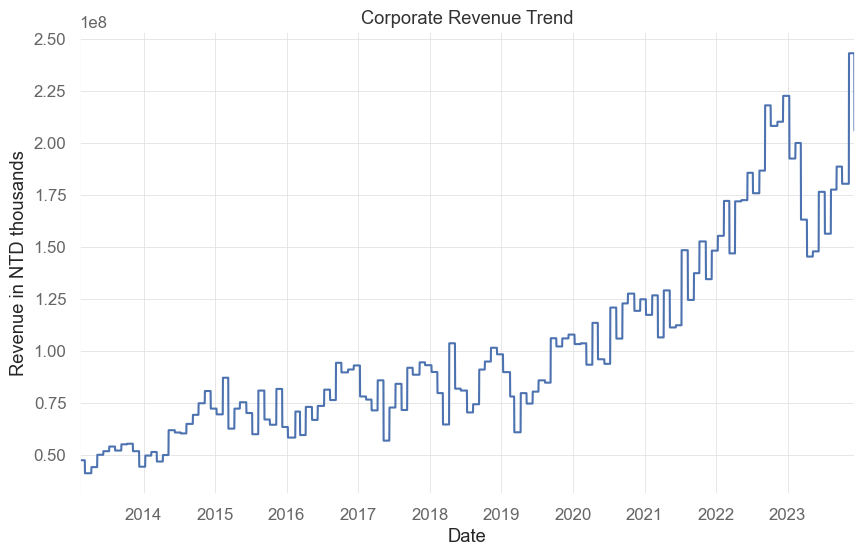

In [113]:
merged_revenue_df['單月營收(千元)'].plot()

plt.xlabel('Date')
plt.ylabel('Revenue in NTD thousands')
plt.title('Corporate Revenue Trend')

## Stock to full time series

In [124]:
corp_stock = df_price.loc[(2330, )]
corp_stock

,簡稱,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元)
年月日,,,,,,,
2010-01-04,台積電,65.0,65.0,64.0,64.9,39511,2557720
2010-01-05,台積電,65.0,65.1,63.9,64.5,38394,2464115
2010-01-06,台積電,64.5,64.9,63.7,64.9,52734,3390698
2010-01-07,台積電,64.9,65.0,64.2,64.2,53294,3437221
2010-01-08,台積電,63.5,64.3,63.5,64.0,48047,3068341
...,...,...,...,...,...,...,...
2023-12-08,台積電,574.0,577.0,570.0,570.0,39243,22520643
2023-12-11,台積電,572.0,575.0,570.0,574.0,29204,16730528
2023-12-12,台積電,580.0,581.0,575.0,578.0,32856,19003744


In [ ]:
date_range = pd.date_range(start=min(corp_stock.index), end=max(corp_stock.index))

empty_df = pd.DataFrame(index=date_range)

merged_price_df = pd.merge_asof(empty_df, corp_stock, left_index=True, right_on='年月日', direction='backward')
merged_price_df.head(30)

Text(0.5, 1.0, 'Corporate Stock Trend')

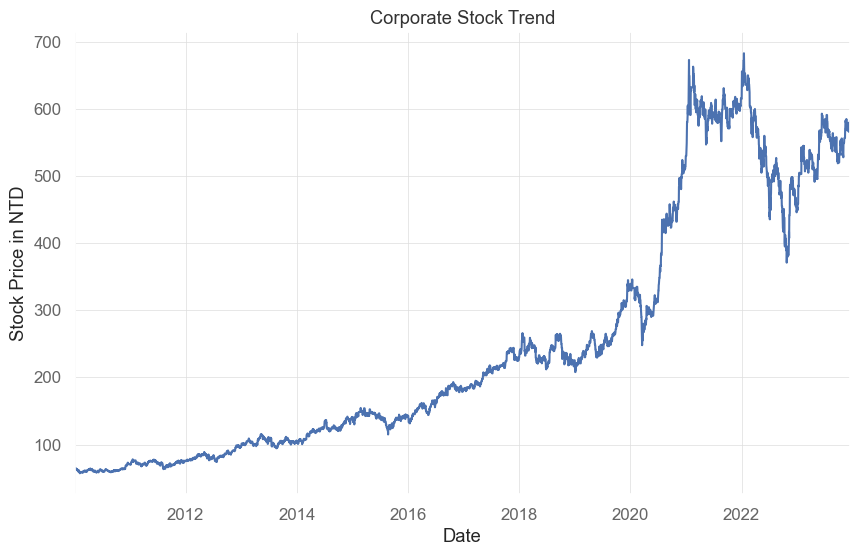

In [122]:
merged_price_df['收盤價(元)'].plot()

plt.xlabel('Date')
plt.ylabel('Stock Price in NTD')
plt.title('Corporate Stock Trend')

## merge IS and Revenue

In [138]:
merged_df = pd.merge(corp_stock, merged_revenue_df, left_index=True, right_index=True, how='inner')
merged_df = merged_df[["簡稱_x","開盤價(元)","最高價(元)","最低價(元)","收盤價(元)","成交量(千股)","成交值(千元)","TSE 產業別","單月營收(千元)","去年單月營收(千元)"]]

In [139]:
merged_df

,簡稱_x,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),TSE 產業別,單月營收(千元),去年單月營收(千元)
2013-02-18,台積電,107.0,108.5,106.5,107.0,64345,6895059,24,47438687,34606486
2013-02-19,台積電,108.5,108.5,106.5,107.0,22103,2372380,24,47438687,34606486
2013-02-20,台積電,108.5,109.5,108.0,109.0,41921,4558604,24,47438687,34606486
2013-02-21,台積電,108.5,108.5,107.0,107.0,30551,3287642,24,47438687,34606486
2013-02-22,台積電,106.0,106.5,105.0,105.5,39577,4188440,24,47438687,34606486
...,...,...,...,...,...,...,...,...,...,...
2023-12-04,台積電,582.0,582.0,571.0,574.0,29424,16917950,24,243202811,210265633
2023-12-05,台積電,571.0,572.0,567.0,570.0,27355,15570195,24,243202811,210265633
2023-12-06,台積電,568.0,575.0,568.0,570.0,23116,13197098,24,243202811,210265633
2023-12-07,台積電,570.0,573.0,566.0,566.0,24259,13786125,24,243202811,210265633


In [155]:
# To check how many non-numerical values there are in a list
name = merged_df.columns[9]
numeric_column = pd.to_numeric( merged_df[name] , errors='coerce')
name, numeric_column.isna().sum()

('去年單月營收(千元)', 0)

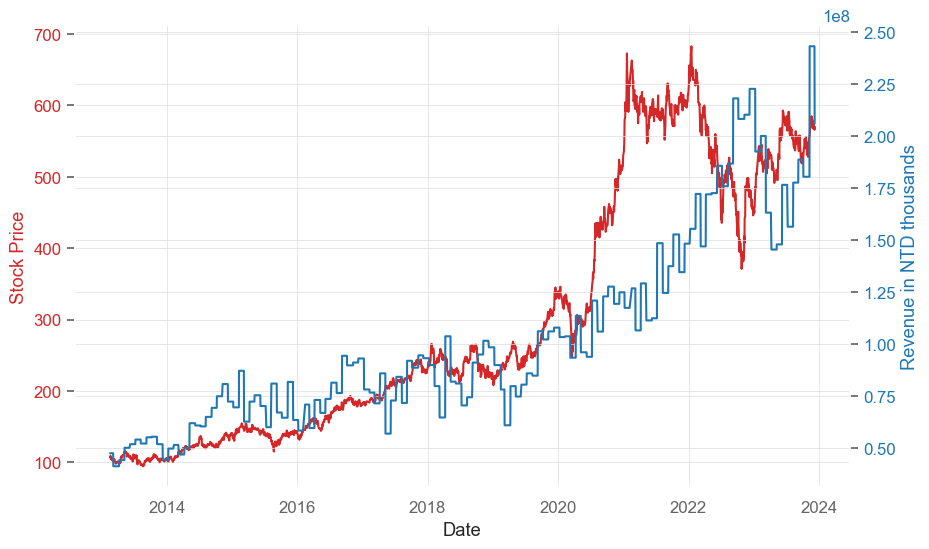

In [158]:
# Plot the first series on the left y-axis
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(merged_df.index, merged_df['收盤價(元)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a twin Axes on the right y-axis
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Revenue in NTD thousands', color=color)
ax2.plot(merged_df.index, merged_df['單月營收(千元)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()